Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

**Introduction:**

An opening of a Supermarket is an interesting and high profit-making business avenue. However, it depends on how successfully you can run business of the Supermarket Store.
On a very broad level success of any supermarket store depends on:

a) Extremely important is - Right location of Store to make sure that customers can easily come and buy products.

b) Customer base - based on Supermarket products range, one should focus on right customer group. For example, the household’s income.

c) Demand - There must be high demand which again depends on the population in the area where store is located, the customer base which one is trying to target and lastly how many such stores are already available in the vicinity.

In this project, we will attempt to solve the problem of a supermarket chain owner/ franchise owner and help them to identify which area / neighborhood in Toronto, Canada, they can open their new store. This will cater to supermarket chain owner, franchise owner for supermarket.
Thus, using the data science & machine learning techniques, this project tries to give a recommendation for an optimal location for opening of a supermarket.



**Data:**

Through this project, focus will be on below factors to decide optimal neighborhood for opening the store:

a) Type of Neighborhood, for example, business & offices, airports, re-creational, residential etc.  -  Most preferred option to target residential area as it will have maximum customer base.

b) Population & their income – For larger customer base, the neighborhood must have moderate to high population density and decent household income.

c) Current market penetration i.e., how many stores are already in the area

To work on above factor and solving the business problem, below data sets will be used:

First, we must identify the neighborhood for Toronto city. The Wikipedia page has list of neighborhoods.
We will use three-digit postal code to identify neighborhood.
Next, to use foursquare location API, we will also need latitude and longitude for each neighborhood. Using this geo-codes and Foursquare location API, we will explore each neighborhood. We will try to cluster the neighborhood based on different category of venues. This will help us further to find the residential areas.
Further, we will use census data to find out population per neighborhood and household income. This is needed to understand potential market for opening the Supermarket.
References-
https://www.toronto.ca/city-government/data-research-maps/open-data/
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M


In [ ]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
# library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Toronto Neighborhood and their Latitude & Longitude

In [ ]:
import pandas as pd
df = pd.read_csv('/content/toronto.csv')
df.head()

PostalCode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [ ]:
df.shape

(103, 5)

## Import Census data to get idea about population & income for each neighborhood

In [ ]:
df_census = pd.read_csv('/content/toronto_census_Data.csv') # load the census data

In [ ]:
df_census.shape

(87, 27)

In [ ]:
df_census.head()

PostalCode      Borough  Neighbourhood Number  Population  \
0        M1B  Scarborough                   263       90290   
1        M1C  Scarborough                   134       12494   
2        M1E  Scarborough                   411       54764   
3        M1G  Scarborough                   137       53485   
4        M1H  Scarborough                   127       29960   

   Population density per square kilometre  Land area in square kilometres  \
0                                     6208                           45.74   
1                                     2403                            5.20   
2                                     8570                           19.04   
3                                     4345                           12.31   
4                                     4011                            7.47   

   Total - Household total income groups  Under $5,000  $5,000 to $9,999  \
0                                  26825           290               240   
1                                   3700            60                25   
2                                  19855           315               540   
3                                  18445           435               455   
4                                  10765           615               220   

   $10,000 to $14,999  $15,000 to $19,999  $20,000 to $24,999  \
0                 420                 720                 730   
1                  45                  60                  70   
2                 815                 970                 880   
3                 685                1170                 825   
4                 255                 450                 370   

   $25,000 to $29,999  $30,000 to $34,999  $35,000 to $39,999  \
0                 925                 955                1090   
1                  80                  90                 120   
2                 890                 905                 885   
3                 960                 910                 950   
4                 475                 465                 520   

   $40,000 to $44,999  $45,000 to $49,999  $50,000 to $59,999  \
0                1055                1110                2330   
1                  80                 115                 230   
2                 905                 815                1565   
3                 955                 815                1725   
4                 495                 530                 935   

   $60,000 to $69,999  $70,000 to $79,999  $80,000 to $89,999  \
0                2150                1930                1845   
1                 230                 200                 195   
2                1360                1255                1140   
3                1405                1240                1070   
4                 845                 765                 615   

   $90,000 to $99,999  $100,000 and over  $100,000 to $124,999  \
0                1640               9340                  3355   
1                 210               1890                   490   
2                1050               5570                  1970   
3                 865               3980                  1660   
4                 575               2625                  1015   

   $125,000 to $149,999  $150,000 to $199,999  $200,000 and over  
0                  2315                  2390               1300  
1                   410                   550                440  
2                  1320                  1390                915  
3                  1030                   855                430  
4                   700                   635                275

In [ ]:
df_census.dropna() # drop NaN from the data

PostalCode           Borough  Neighbourhood Number  Population  \
0         M1B       Scarborough                   263       90290   
1         M1C       Scarborough                   134       12494   
2         M1E       Scarborough                   411       54764   
3         M1G       Scarborough                   137       53485   
4         M1H       Scarborough                   127       29960   
5         M1J       Scarborough                   139       16724   
6         M1K       Scarborough                   125       13641   
7         M1L       Scarborough                   302       56512   
8         M1M       Scarborough                   385       55834   
9         M1N       Scarborough                   122       22291   
10        M1P       Scarborough                   256       51575   
11        M1R       Scarborough                   119       27917   
12        M1S       Scarborough                   128       23757   
13        M1T       Scarborough                   118       27446   
14        M1V       Scarborough                   379       86468   
15        M1W       Scarborough                   116       24623   
16        M1X       Scarborough                    25       30491   
17        M2H        North York                    48       16934   
18        M2J        North York                   100       42774   
19        M2K        North York                    52       21396   
20        M2L        North York                    81       27078   
21        M2M        North York                   137       90362   
22        M2N        North York                    37       16936   
23        M2R        North York                    35       26274   
24        M3A        North York                    45       34805   
25        M3B        North York                    42       27695   
26        M3C        North York                    44       21933   
27        M3H        North York                    93       67397   
28        M3J        North York                    27       27593   
29        M3K        North York                    38       16164   
30        M3M        North York                   110       11058   
31        M4A        North York                    43       17510   
32        M4B         East York                   118       31216   
33        M4C         East York                    60        7865   
34        M4E      East Toronto                    63       21567   
35        M4G         East York                    56       16828   
36        M4H         East York                    55       21108   
37        M4J         East York                    57       11499   
38        M4K      East Toronto                   200       61173   
39        M4L      East Toronto                    54       18675   
40        M4N   Central Toronto                   208       29786   
41        M4P   Central Toronto                   203       46433   
42        M4S   Central Toronto                   100       11817   
43        M4T   Central Toronto                    98       20923   
44        M4V   Central Toronto                    96       10968   
45        M4X  Downtown Toronto                   145       30284   
46        M5A  Downtown Toronto                   149       76716   
47        M5B  Downtown Toronto                   107       21210   
48        M5C  Downtown Toronto                    46       15818   
49        M5G  Downtown Toronto                    76       25797   
50        M5H  Downtown Toronto                    69        7727   
51        M5J  Downtown Toronto                    73       20506   
52        M5K  Downtown Toronto                    80       13826   
53        M5M        North York                    39       23236   
54        M5N   Central Toronto                     1       33312   
55        M5P   Central Toronto                   203       23538   
56        M5R   Central Toronto                    95       30526   
5

In [ ]:
df_census.shape

(87, 27)

## Merging two data frames on common key Postal code
### Create a new DataFrame by combining the two DataFrames : 1) Geo spacial 
### data and census data

In [ ]:
df_data = pd.merge( df,df_census,on=('PostalCode') ,how='inner')

In [ ]:
df_data.shape

(87, 31)

In [ ]:
df_data.columns

Index(['PostalCode', 'Borough_x', 'Neighborhood', 'Latitude', 'Longitude',
       'Borough_y', 'Neighbourhood Number', 'Population',
       'Population density per square kilometre',
       'Land area in square kilometres',
       'Total - Household total income groups', 'Under $5,000',
       '$5,000 to $9,999', '$10,000 to $14,999', '$15,000 to $19,999',
       '$20,000 to $24,999', '$25,000 to $29,999', '$30,000 to $34,999',
       '$35,000 to $39,999', '$40,000 to $44,999', '$45,000 to $49,999',
       '$50,000 to $59,999', '$60,000 to $69,999', '$70,000 to $79,999',
       '$80,000 to $89,999', '$90,000 to $99,999', '$100,000 and over',
       '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999',
       '$200,000 and over'],
      dtype='object')

## Renaming columns names those are indicating income groups for ease of performing operations on them

In [ ]:
df_data.rename(columns = {'Under $5,000':'GRP1',
       '$5,000 to $9,999':'GRP2', '$10,000 to $14,999':'GRP3', '$15,000 to $19,999':'GRP4',
       '$20,000 to $24,999':'GRP5', '$25,000 to $29,999':'GRP6', '$30,000 to $34,999':'GRP7',
       '$35,000 to $39,999':'GRP8', '$40,000 to $44,999':'GRP9', '$45,000 to $49,999':'GRP10',
       '$50,000 to $59,999':'GRP11', '$60,000 to $69,999':'GRP12', '$70,000 to $79,999':'GRP13',
       '$80,000 to $89,999':'GRP14', '$90,000 to $99,999':'GRP15', '$100,000 and over':'GRP16',
       '$100,000 to $124,999':'GRP17', '$125,000 to $149,999':'GRP18', '$150,000 to $199,999':'GRP19',
       '$200,000 and over':'GRP20'}, inplace = True)

In [ ]:
len(df_data)

87

## Adding a new column Avg_Income
Note: In census data we have two parameters:
1. Different income group ranges / neighborhood
2. Number of household in different income group range / neighborhood

So, first of all we will take approximate average of each range. For example, for 5 K to 9999, average will be approximated to 7500.

Then, we will multiply number of house hold in the group to above calculate average for each range.

Finally, we will take mean, so this sort of gives weighted mean for each neighborhood. 

In [ ]:
df_data["Avg_Income"] = ""

In [ ]:
df_data["Avg_Income"]=(5000*df_data["GRP1"]+7500*df_data["GRP2"]+12500*df_data["GRP3"]+17500*df_data["GRP4"]+22500*df_data["GRP5"]+27500*df_data["GRP6"]+32500*df_data["GRP7"]+37500*df_data["GRP8"]+42500*df_data["GRP9"]+47500*df_data["GRP10"]+55000*df_data["GRP11"]+65000*df_data["GRP12"]+\
 75000*df_data["GRP13"]+85000*df_data["GRP14"]+95000*df_data["GRP15"]+112500*df_data["GRP17"]+137500*df_data["GRP18"]+\
 175000*df_data["GRP19"]+200000*df_data["GRP20"])/df_data['Total - Household total income groups']

In [ ]:
df_data

PostalCode         Borough_x  \
0         M1B       Scarborough   
1         M1C       Scarborough   
2         M1E       Scarborough   
3         M1G       Scarborough   
4         M1H       Scarborough   
5         M1J       Scarborough   
6         M1K       Scarborough   
7         M1L       Scarborough   
8         M1M       Scarborough   
9         M1N       Scarborough   
10        M1P       Scarborough   
11        M1R       Scarborough   
12        M1S       Scarborough   
13        M1T       Scarborough   
14        M1V       Scarborough   
15        M1W       Scarborough   
16        M1X       Scarborough   
17        M2H        North York   
18        M2J        North York   
19        M2K        North York   
20        M2L        North York   
21        M2M        North York   
22        M2N        North York   
23        M2R        North York   
24        M3A        North York   
25        M3B        North York   
26        M3C        North York   
27        M3H        North York   
28        M3J        North York   
29        M3K        North York   
30        M3M        North York   
31        M4A        North York   
32        M4B         East York   
33        M4C         East York   
34        M4E      East Toronto   
35        M4G         East York   
36        M4H         East York   
37        M4J         East York   
38        M4K      East Toronto   
39        M4L      East Toronto   
40        M4N   Central Toronto   
41        M4P   Central Toronto   
42        M4S   Central Toronto   
43        M4T   Central Toronto   
44        M4V   Central Toronto   
45        M4X  Downtown Toronto   
46        M5A  Downtown Toronto   
47        M5B  Downtown Toronto   
48        M5C  Downtown Toronto   
49        M5G  Downtown Toronto   
50        M5H  Downtown Toronto   
51        M5J  Downtown Toronto   
52        M5K  Downtown Toronto   
53        M5M        North York   
54        M5N   Central Toronto   
55        M5P   Central Toronto   
56        M5R   Central Toronto   
57        M5S  Downtown Toronto   
58        M5T  Downtown Toronto   
59        M5V  Downtown Toronto   
60        M5X  Downtown Toronto   
61        M6A        North York   
62        M6C              York   
63        M6E              York   
64        M6H      West Toronto   
65        M6J      West Toronto   
66        M6K      West Toronto   
67        M6L        North York   
68        M6M              York   
69        M6N              York   
70        M6P      West Toronto   
71        M6R      West Toronto   
72        M6S      West Toronto   
73        M7R       Mississauga   
74        M8V         Etobicoke   
75        M8W         Etobicoke   
76        M8X         Etobicoke   
77        M8Y         Etobicoke   
78        M8Z         Etobicoke   
79        M9B         Etobicoke   
80        M9C         Etobicoke   
81        M9L        North York   
82        M9M        North York   
83        M9N              York   
84        M9P         Etobicoke   
85        M9R         Etobicoke   
86        M9V         Etobicoke   

                                         Neighborhood   Latitude  Longitude  \
0                                      Rouge, Malvern  43.806686 -79.194353   
1              Highland Creek, Rouge Hill, Port Union  43.784535 -79.160497   
2                   Guildwood, Morningside, West Hill  43.763573 -79.188711   
3                                              Woburn  43.770992 -79.216917   
4                                           Cedarbrae  43.773136 -79.239476   
5                                 Scarborough Village  43.744734 -79.239476   
6         East Birchmount Park, Ionview, Kennedy Park  43.727929 -79.262029   
7                     Clairlea, Golden Mile, Oakridge  43.711112 -79.284577   
8     Cliffcrest, Cliffside, Scarborough Village West  43.716316 -79.239476   
9                         Birch Cliff, Cliffside West  43.692657 -79.264848   
10  Dorset Park, Scarborough Town Centre, Wexford ...

In [ ]:
# Since Borough was part of both Data frames, it got duplicated. Removing one column..
df_data.drop('Borough_y', 1)

PostalCode         Borough_x  \
0         M1B       Scarborough   
1         M1C       Scarborough   
2         M1E       Scarborough   
3         M1G       Scarborough   
4         M1H       Scarborough   
5         M1J       Scarborough   
6         M1K       Scarborough   
7         M1L       Scarborough   
8         M1M       Scarborough   
9         M1N       Scarborough   
10        M1P       Scarborough   
11        M1R       Scarborough   
12        M1S       Scarborough   
13        M1T       Scarborough   
14        M1V       Scarborough   
15        M1W       Scarborough   
16        M1X       Scarborough   
17        M2H        North York   
18        M2J        North York   
19        M2K        North York   
20        M2L        North York   
21        M2M        North York   
22        M2N        North York   
23        M2R        North York   
24        M3A        North York   
25        M3B        North York   
26        M3C        North York   
27        M3H        North York   
28        M3J        North York   
29        M3K        North York   
30        M3M        North York   
31        M4A        North York   
32        M4B         East York   
33        M4C         East York   
34        M4E      East Toronto   
35        M4G         East York   
36        M4H         East York   
37        M4J         East York   
38        M4K      East Toronto   
39        M4L      East Toronto   
40        M4N   Central Toronto   
41        M4P   Central Toronto   
42        M4S   Central Toronto   
43        M4T   Central Toronto   
44        M4V   Central Toronto   
45        M4X  Downtown Toronto   
46        M5A  Downtown Toronto   
47        M5B  Downtown Toronto   
48        M5C  Downtown Toronto   
49        M5G  Downtown Toronto   
50        M5H  Downtown Toronto   
51        M5J  Downtown Toronto   
52        M5K  Downtown Toronto   
53        M5M        North York   
54        M5N   Central Toronto   
55        M5P   Central Toronto   
56        M5R   Central Toronto   
57        M5S  Downtown Toronto   
58        M5T  Downtown Toronto   
59        M5V  Downtown Toronto   
60        M5X  Downtown Toronto   
61        M6A        North York   
62        M6C              York   
63        M6E              York   
64        M6H      West Toronto   
65        M6J      West Toronto   
66        M6K      West Toronto   
67        M6L        North York   
68        M6M              York   
69        M6N              York   
70        M6P      West Toronto   
71        M6R      West Toronto   
72        M6S      West Toronto   
73        M7R       Mississauga   
74        M8V         Etobicoke   
75        M8W         Etobicoke   
76        M8X         Etobicoke   
77        M8Y         Etobicoke   
78        M8Z         Etobicoke   
79        M9B         Etobicoke   
80        M9C         Etobicoke   
81        M9L        North York   
82        M9M        North York   
83        M9N              York   
84        M9P         Etobicoke   
85        M9R         Etobicoke   
86        M9V         Etobicoke   

                                         Neighborhood   Latitude  Longitude  \
0                                      Rouge, Malvern  43.806686 -79.194353   
1              Highland Creek, Rouge Hill, Port Union  43.784535 -79.160497   
2                   Guildwood, Morningside, West Hill  43.763573 -79.188711   
3                                              Woburn  43.770992 -79.216917   
4                                           Cedarbrae  43.773136 -79.239476   
5                                 Scarborough Village  43.744734 -79.239476   
6         East Birchmount Park, Ionview, Kennedy Park  43.727929 -79.262029   
7                     Clairlea, Golden Mile, Oakridge  43.711112 -79.284577   
8     Cliffcrest, Cliffside, Scarborough Village West  43.716316 -79.239476   
9                         Birch Cliff, Cliffside West  43.692657 -79.264848   
10  Dorset Park, Scarborough Town Centre, Wexford ...

### **Let's get Latitude and Longitude for Toronto, Canada**

In [ ]:
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="toronto_usr")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 43.6534817, -79.3839347.


### **Now, let's impose our neighbourhood on the map**

In [ ]:
# create map of New York using latitude and longitude values
map_toronoto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronoto)  
    
map_toronoto

### Foursquare API Credentials

In [1]:
CLIENT_ID = '###############################################' # your Foursquare ID
CLIENT_SECRET = '###############################################' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ###############################################
CLIENT_SECRET:###############################################


### **Below function will get the list of all venues and venue category which are within 500 m raidus of each neighbourhood by passing their latitude and longitude to foursquare API**

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
LIMIT=200
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West, Steeles West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The D

## Below dataframe shows each neighborhood, venues in it with venue category.

In [ ]:
print(toronto_venues.shape)
toronto_venues.head()

(2132, 7)


Neighborhood  Neighborhood Latitude  \
0                          Rouge, Malvern              43.806686   
1  Highland Creek, Rouge Hill, Port Union              43.784535   
2  Highland Creek, Rouge Hill, Port Union              43.784535   
3       Guildwood, Morningside, West Hill              43.763573   
4       Guildwood, Morningside, West Hill              43.763573   

   Neighborhood Longitude                        Venue  Venue Latitude  \
0              -79.194353                      Wendy’s       43.807448   
1              -79.160497  Great Shine Window Cleaning       43.783145   
2              -79.160497        Royal Canadian Legion       43.782533   
3              -79.188711               RBC Royal Bank       43.766790   
4              -79.188711            G & G Electronics       43.765309   

   Venue Longitude        Venue Category  
0       -79.199056  Fast Food Restaurant  
1       -79.157431          Home Service  
2       -79.163085                   Bar  
3       -79.191151                  Bank  
4       -79.191537     Electronics Store

### Unique categories of venue in each neighborhood

In [ ]:
toronto_venues['Venue Category'].unique()

array(['Fast Food Restaurant', 'Home Service', 'Bar', 'Bank',
       'Electronics Store', 'Restaurant', 'Mexican Restaurant',
       'Rental Car Location', 'Donut Shop', 'Medical Center',
       'Intersection', 'Breakfast Spot', 'Coffee Shop',
       'Korean BBQ Restaurant', 'Caribbean Restaurant',
       'Hakka Restaurant', 'Thai Restaurant', 'Athletics & Sports',
       'Gas Station', 'Bakery', 'Fried Chicken Joint', 'Playground',
       'Department Store', 'Convenience Store', 'Discount Store',
       'Chinese Restaurant', 'Hobby Shop', 'Ice Cream Shop', 'Bus Line',
       'Bus Station', 'Park', 'Soccer Field', 'Motel',
       'American Restaurant', 'Café', 'General Entertainment',
       'Skating Rink', 'College Stadium', 'Indian Restaurant',
       'Pet Store', 'Vietnamese Restaurant', 'Light Rail Station',
       'Brewery', 'Sandwich Place', 'Middle Eastern Restaurant',
       'Auto Garage', 'Latin American Restaurant', 'Lounge',
       'Clothing Store', 'Italian Restaurant', 'No

In [ ]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Adelaide, King, Richmond                                               98   
Agincourt                                                               5   
Agincourt North, L'Amoreaux East, Milliken, Ste...                      4   
Albion Gardens, Beaumond Heights, Humbergate, J...                      9   
Alderwood, Long Branch                                                  8   
Bathurst Manor, Downsview North, Wilson Heights                        22   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      22   
Berczy Park                                                            57   
Birch Cliff, Cliffside West                                             4   
Bloordale Gardens, Eringate, Markland Wood, Old...                     10   
Brockton, Exhibition Place, Parkdale Village                           25   
Business Reply Mail Processing Centre 969 Eastern                      15   
CFB Toronto, Downsview East                                             4   
CN Tower, Bathurst Quay, Island airport, Harbou...                     16   
Cabbagetown, St. James Town                                            42   
Caledonia-Fairbanks                                                     5   
Canada Post Gateway Processing Centre                                  14   
Cedarbrae                                                               8   
Central Bay Street                                                     68   
Chinatown, Grange Park, Kensington Market                              69   
Christie                                                               15   
Church and Wellesley                                                   81   
Clairlea, Golden Mile, Oakridge                                         7   
Clarks Corners, Sullivan, Tam O'Shanter                                12   
Cliffcrest, Cliffside, Scarborough Village West                         2   
Cloverdale, Islington, Martin Grove, Princess G...                      2   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             36   
Davisville North                                                        8   
Deer Park, Forest Hill SE, Rathnelly, South Hil...                     14   
Del Ray, Keelesdale, Mount Dennis, Silverthorn                          5   
Design Exchange, Toronto Dominion Centre                              100   
Don Mills North                                                         5   
Dorset Park, Scarborough Town Centre, Wexford H...                      7   
Dovercourt Village, Dufferin                                           15   
Downsview Central                                                       3   
Downsview Northwest                                                     4   
Downsview West                                                          4   
East Birchmount Park, Ionview, Kennedy Park                             6   
East Toronto                                                            4   
Emery, Humberlea                                                        2   
Fairview, Henry Farm, Oriole                                           67   
First Canadian Place, Underground city                                100   
Flemingdon Park, Don Mills South                                       20   
Forest Hill North, Forest Hill West                                     4   
Glencairn                                                               6   
Guildwood, Morningside, West Hill                                       9   
Harbord, University of Toronto                                         35   
Harbourfront East, Toronto Islands, Union Station                     100   
Harbourfront, Regent Park                       

In [ ]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))


There are 270 uniques categories.


### One hot encode the unique categories 

In [ ]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

  toronto_onehot.head()

Yoga Studio  Accessories Store  Adult Boutique  Airport  \
0            0                  0               0        0   
1            0                  0               0        0   
2            0                  0               0        0   
3            0                  0               0        0   
4            0                  0               0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0              0          0           0           0       0   
1            0              0          0           0           0       0   
2            0              0          0           0           0       0   
3            0              0          0           0           0       0   
4            0              0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0     0    0               0                 0                 0   
1     0    0               0                 0                 0   
2     0    1               0                 0                 0   
3     1    0               0                 0                 0   
4     0    0               0                 0                 0   

   Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                   0      0                0         0           0   
1                   0      0                0         0           0   
2                   0      0                0         0           0   
3                   0      0                0         0           0   
4                   0      0                0         0           0   

   Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  Bistro  \
0                   0                         0          0       0   
1                   0                         0          0       0   
2                   0                         0          0       0   
3                   0                         0          0       0   
4                   0                         0          0       0   

   Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  \
0              0          0         0                     0               0   
1              0          0         0                     0               0   
2              0          0         0                     0               0   
3              0          0         0                     0               0   
4              0          0         0                     0               0   

   Brewery  Bridal Shop  Bubble Tea Shop  Building  Burger Joint

In [ ]:
toronto_onehot.shape

(2132, 270)

In [ ]:
venues_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

Neighborhood  Yoga Studio  \
0                            Adelaide, King, Richmond            0   
1                                           Agincourt            0   
2   Agincourt North, L'Amoreaux East, Milliken, St...            0   
3   Albion Gardens, Beaumond Heights, Humbergate, ...            0   
4                              Alderwood, Long Branch            0   
5     Bathurst Manor, Downsview North, Wilson Heights            0   
6                                     Bayview Village            0   
7                   Bedford Park, Lawrence Manor East            0   
8                                         Berczy Park            0   
9                         Birch Cliff, Cliffside West            0   
10  Bloordale Gardens, Eringate, Markland Wood, Ol...            0   
11       Brockton, Exhibition Place, Parkdale Village            0   
12  Business Reply Mail Processing Centre 969 Eastern            0   
13                        CFB Toronto, Downsview East            0   
14  CN Tower, Bathurst Quay, Island airport, Harbo...            0   
15                        Cabbagetown, St. James Town            0   
16                                Caledonia-Fairbanks            0   
17              Canada Post Gateway Processing Centre            0   
18                                          Cedarbrae            0   
19                                 Central Bay Street            1   
20          Chinatown, Grange Park, Kensington Market            0   
21                                           Christie            0   
22                               Church and Wellesley            2   
23                    Clairlea, Golden Mile, Oakridge            0   
24            Clarks Corners, Sullivan, Tam O'Shanter            0   
25    Cliffcrest, Cliffside, Scarborough Village West            0   
26  Cloverdale, Islington, Martin Grove, Princess ...            0   
27                     Commerce Court, Victoria Hotel            0   
28                                         Davisville            0   
29                                   Davisville North            0   
30  Deer Park, Forest Hill SE, Rathnelly, South Hi...            0   
31     Del Ray, Keelesdale, Mount Dennis, Silverthorn            0   
32           Design Exchange, Toronto Dominion Centre            0   
33                                    Don Mills North            0   
34  Dorset Park, Scarborough Town Centre, Wexford ...            0   
35                       Dovercourt Village, Dufferin            0   
36                                  Downsview Central            0   
37                                Downsview Northwest            0   
38                                     Downsview West            0   
39        East Birchmount Park, Ionview, Kennedy Park            0   
40                                       East Toronto            0   
41                                   Emery, Humberlea            0   
42                       Fairview, Henry Farm, Oriole            0   
43             First Canadian Place, Underground city            0   
44                   Flemingdon Park, Don Mills South            0   
45                Forest Hill North, Forest Hill West            0   
46                                          Glencairn            0   
47                  Guildwood, Morningside, West Hill            0   
48                     Harbord, University of Toronto            1   
49  Harbourfront East, Toronto Islands, Union Station            0   
50                          Harbourfront, Regent Park            1   
51                      High Park, The Junction South            0   
52             Highland Creek, Rouge Hill, Port Union            0   
53                                  Hillcrest Village            0   
54       Humber Bay Shores, Mimico South, New Toronto            0   
55  Humber Bay, King's Mill Park, Kingsway Park So...            0   
56                                      Humber Summ

### Finding top 10 venues in each neighborhood

In [ ]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  10.0
1             Café   5.0
2  Thai Restaurant   4.0
3       Restaurant   4.0
4              Gym   3.0
5   Clothing Store   3.0
6            Hotel   3.0
7    Deli / Bodega   3.0
8              Bar   2.0
9           Bakery   2.0


----Agincourt----
                        venue  freq
0                      Lounge   1.0
1   Latin American Restaurant   1.0
2                Skating Rink   1.0
3              Clothing Store   1.0
4              Breakfast Spot   1.0
5               Metro Station   0.0
6  Modern European Restaurant   0.0
7           Mobile Phone Shop   0.0
8          Miscellaneous Shop   0.0
9   Middle Eastern Restaurant   0.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                             venue  freq
0                             Park   1.0
1                       Playground   1.0
2              Arts & Crafts Store   1.0
3                     Intersection   1.0
4   

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()


Neighborhood  \
0                           Adelaide, King, Richmond   
1                                          Agincourt   
2  Agincourt North, L'Amoreaux East, Milliken, St...   
3  Albion Gardens, Beaumond Heights, Humbergate, ...   
4                             Alderwood, Long Branch   

       1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                Coffee Shop                  Café            Restaurant   
1  Latin American Restaurant                Lounge          Skating Rink   
2                       Park   Arts & Crafts Store          Intersection   
3              Grocery Store              Pharmacy        Sandwich Place   
4                Pizza Place                   Gym           Coffee Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0       Thai Restaurant         Deli / Bodega        Clothing Store   
1        Clothing Store        Breakfast Spot      Doner Restaurant   
2            Playground   Distribution Center          Dessert Shop   
3  Fast Food Restaurant           Pizza Place   Fried Chicken Joint   
4        Sandwich Place              Pharmacy                   Pub   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                   Gym                 Hotel                   Bar   
1                 Diner        Discount Store   Distribution Center   
2    Dim Sum Restaurant                 Diner        Discount Store   
3           Video Store            Beer Store            Donut Shop   
4          Dance Studio         Women's Store                 Diner   

  10th Most Common Venue  
0             Steakhouse  
1                Dog Run  
2                Dog Run  
3              Drugstore  
4       Department Store

In [ ]:
venues_grouped.head()

Neighborhood  Yoga Studio  \
0                           Adelaide, King, Richmond            0   
1                                          Agincourt            0   
2  Agincourt North, L'Amoreaux East, Milliken, St...            0   
3  Albion Gardens, Beaumond Heights, Humbergate, ...            0   
4                             Alderwood, Long Branch            0   

   Accessories Store  Adult Boutique  Airport  Airport Food Court  \
0                  0               0        0                   0   
1                  0               0        0                   0   
2                  0               0        0                   0   
3                  0               0        0                   0   
4                  0               0        0                   0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0             0               0                0                 0   
1             0               0                0                 0   
2             0               0                0                 0   
3             0               0                0                 0   
4             0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                    2             0         0            1           1   
1                    0             0         0            0           0   
2                    0             0         0            0           0   
3                    0             0         0            0           0   
4                    0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                    0                 1                   0            0   
1                    0                 0                   0            0   
2                    1                 0                   0            0   
3                    0                 0                   0            0   
4                    0                 0                   0            0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       2     1    2   
1              0          0           0           0       0     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Beach  Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  \
0      0                0         0           0                   0   
1      0                0         0           0                   0   
2      0                0         0           0                   0   
3      0                0         0           1                   0   
4      0                0         0           0                   0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Boat or Ferry  Bookstore  \
0                         0          0       0              0          2   
1                         0          0       0              0          0   
2                         0          0       0              0          0   
3                         0          0       0              0          0   
4                         0          0       0              0          0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0       

In [ ]:
venues_sorted.shape

(101, 11)

### Next, applying elbow method, to find optimal number of clusters

1 2 3 4 5 6 7 8 9 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

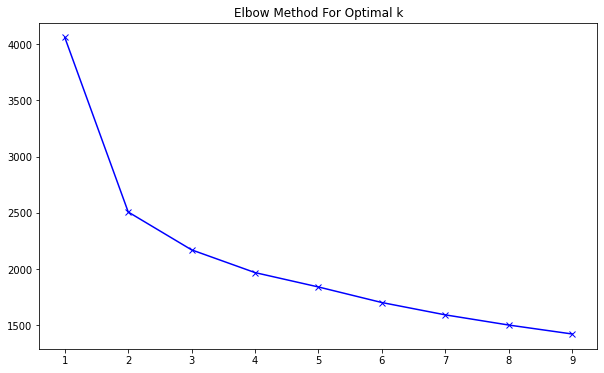

In [ ]:
# Elbow method for clustering
from matplotlib import pyplot as plt
toronto_grouped_clustering = venues_grouped.drop('Neighborhood', 1)
sum_of_squared_distances = []

# maximum of 10 clusters
K = range(1,10)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(toronto_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')

### From above graph, we take number of clusters as 4...

In [ ]:
# set number of clusters
kclusters = 4
from sklearn.cluster import KMeans
toronto_grouped_clustering = venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 2, 3, 3,
       2, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 2, 1, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
venues_sorted

Neighborhood  \
0                            Adelaide, King, Richmond   
1                                           Agincourt   
2   Agincourt North, L'Amoreaux East, Milliken, St...   
3   Albion Gardens, Beaumond Heights, Humbergate, ...   
4                              Alderwood, Long Branch   
5     Bathurst Manor, Downsview North, Wilson Heights   
6                                     Bayview Village   
7                   Bedford Park, Lawrence Manor East   
8                                         Berczy Park   
9                         Birch Cliff, Cliffside West   
10  Bloordale Gardens, Eringate, Markland Wood, Ol...   
11       Brockton, Exhibition Place, Parkdale Village   
12  Business Reply Mail Processing Centre 969 Eastern   
13                        CFB Toronto, Downsview East   
14  CN Tower, Bathurst Quay, Island airport, Harbo...   
15                        Cabbagetown, St. James Town   
16                                Caledonia-Fairbanks   
17              Canada Post Gateway Processing Centre   
18                                          Cedarbrae   
19                                 Central Bay Street   
20          Chinatown, Grange Park, Kensington Market   
21                                           Christie   
22                               Church and Wellesley   
23                    Clairlea, Golden Mile, Oakridge   
24            Clarks Corners, Sullivan, Tam O'Shanter   
25    Cliffcrest, Cliffside, Scarborough Village West   
26  Cloverdale, Islington, Martin Grove, Princess ...   
27                     Commerce Court, Victoria Hotel   
28                                         Davisville   
29                                   Davisville North   
30  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
31     Del Ray, Keelesdale, Mount Dennis, Silverthorn   
32           Design Exchange, Toronto Dominion Centre   
33                                    Don Mills North   
34  Dorset Park, Scarborough Town Centre, Wexford ...   
35                       Dovercourt Village, Dufferin   
36                                  Downsview Central   
37                                Downsview Northwest   
38                                     Downsview West   
39        East Birchmount Park, Ionview, Kennedy Park   
40                                       East Toronto   
41                                   Emery, Humberlea   
42                       Fairview, Henry Farm, Oriole   
43             First Canadian Place, Underground city   
44                   Flemingdon Park, Don Mills South   
45                Forest Hill North, Forest Hill West   
46                                          Glencairn   
47                  Guildwood, Morningside, West Hill   
48                     Harbord, University of Toronto   
49  Harbourfront East, Toronto Islands, Union Station   
50                          Harbourfront, Regent Park   
51                      High Park, The Junction South   
52             Highland Creek, Rouge Hill, Port Union   
53                                  Hillcrest Village   
54       Humber Bay Shores, Mimico South, New Toronto   
55  Humber Bay, King's Mill Park, Kingsway Park So...   
56                                      Humber Summit   
57                                 Humewood-Cedarvale   
58  Kingsview Village, Martin Grove Gardens, Richv...   
59  Kingsway Park South West, Mimico NW, The Queen...   
60                      L'Amoreaux West, Steeles West   
61                   Lawrence Heights, Lawrence Manor   
62                                      Lawrence Park   
63                                            Leaside   
64                           Little Portugal, Trinity   
65           Maple Leaf Park, North Park, Upwood Park   
66                                  Maryvale, Wexford   
67                        Moore Park, Summerhill East   
68                            Newtonbrook, Willowdale   
69                                 North Toronto We

In [ ]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

PostalCode    Borough_x                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude    Borough_y  Neighbourhood Number  Population  \
0 -79.194353  Scarborough                   263       90290   
1 -79.160497  Scarborough                   134       12494   
2 -79.188711  Scarborough                   411       54764   
3 -79.216917  Scarborough                   137       53485   
4 -79.239476  Scarborough                   127       29960   

   Population density per square kilometre  Land area in square kilometres  \
0                                     6208                           45.74   
1                                     2403                            5.20   
2                                     8570                           19.04   
3                                     4345                           12.31   
4                                     4011                            7.47   

   Total - Household total income groups  GRP1  GRP2  GRP3  GRP4  GRP5  GRP6  \
0                                  26825   290   240   420   720   730   925   
1                                   3700    60    25    45    60    70    80   
2                                  19855   315   540   815   970   880   890   
3                                  18445   435   455   685  1170   825   960   
4                                  10765   615   220   255   450   370   475   

   GRP7  GRP8  GRP9  GRP10  GRP11  GRP12  GRP13  GRP14  GRP15  GRP16  GRP17  \
0   955  1090  1055   1110   2330   2150   1930   1845   1640   9340   3355   
1    90   120    80    115    230    230    200    195    210   1890    490   
2   905   885   905    815   1565   1360   1255   1140   1050   5570   1970   
3   910   950   955    815   1725   1405   1240   1070    865   3980   1660   
4   465   520   495    530    935    845    765    615    575   2625   1015   

   GRP18  GRP19  GRP20     Avg_Income  Cluster Labels 1st Most Common Venue  \
0   2315   2390   1300   86923.112768             0.0  Fast Food Restaurant   
1    410    550    440  107307.432432             0.0          Home Service   
2   1320   1390    915   76125.031478             0.0     Electronics Store   
3   1030    855    430   67249.254541             0.0           Coffee Shop   
4    700    635    275   71081.049698             0.0   Fried Chicken Joint   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0          Women's Store      Doner Restaurant          Dessert Shop   
1                    Bar         Women's Store      Department Store   
2         Medical Center            Restaurant   Rental Car Location   
3  Korean BBQ Restaurant         Women's Store      Doner Restaurant   
4            Gas Station      Hakka Restaurant                Bakery   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Dim Sum Restaurant                 Diner        Discount Store   
1    Dim Sum Restaurant                 Diner        Discount Store   
2          Intersection                  Bank    Mexican Restaurant   
3    Dim Sum Restaurant                 Diner        Discount Store   
4    Athletics & Sports                  Bank       Thai Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0   Distribution Center               Dog Run             Donut Shop  
1   Distribution Center               Dog Run       Doner Restaurant  
2        Breakfast Spot            Donut Shop       Doner Restaurant  
3   Distribution Center               Dog Run              Drugstore  
4  Caribbean Restaurant    

### Deleting cluster label is not set if that happens

In [ ]:
toronto_merged_df = toronto_merged.dropna( how='any',subset=['Cluster Labels'])

### Cluster label changing it to INTEGER

In [ ]:
toronto_merged_df['Cluster Labels'] = toronto_merged_df['Cluster Labels'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Plotting on map different clusters

In [ ]:
# create map
import folium
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_df['Latitude'], toronto_merged_df['Longitude'], toronto_merged_df['Neighborhood'], toronto_merged_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
toronto_merged_df.columns

Index(['PostalCode', 'Borough_x', 'Neighborhood', 'Latitude', 'Longitude',
       'Borough_y', 'Neighbourhood Number', 'Population',
       'Population density per square kilometre',
       'Land area in square kilometres',
       'Total - Household total income groups', 'GRP1', 'GRP2', 'GRP3', 'GRP4',
       'GRP5', 'GRP6', 'GRP7', 'GRP8', 'GRP9', 'GRP10', 'GRP11', 'GRP12',
       'GRP13', 'GRP14', 'GRP15', 'GRP16', 'GRP17', 'GRP18', 'GRP19', 'GRP20',
       'SpendingPower', 'SpendingPower_std', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

### Cluster 0 ===>

In [ ]:
toronto_merged_df.loc[toronto_merged_df['Cluster Labels'] == 0, toronto_merged_df.columns[[1] +[2] + [3] + [4] + list(range(33, toronto_merged_df.shape[1]))]]

Borough_x                                       Neighborhood  \
0        Scarborough                                     Rouge, Malvern   
1        Scarborough             Highland Creek, Rouge Hill, Port Union   
2        Scarborough                  Guildwood, Morningside, West Hill   
3        Scarborough                                             Woburn   
4        Scarborough                                          Cedarbrae   
5        Scarborough                                Scarborough Village   
6        Scarborough        East Birchmount Park, Ionview, Kennedy Park   
7        Scarborough                    Clairlea, Golden Mile, Oakridge   
8        Scarborough    Cliffcrest, Cliffside, Scarborough Village West   
9        Scarborough                        Birch Cliff, Cliffside West   
10       Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...   
11       Scarborough                                  Maryvale, Wexford   
12       Scarborough                                          Agincourt   
13       Scarborough            Clarks Corners, Sullivan, Tam O'Shanter   
14       Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...   
15       Scarborough                      L'Amoreaux West, Steeles West   
17        North York                                  Hillcrest Village   
19        North York                                    Bayview Village   
21        North York                            Newtonbrook, Willowdale   
23        North York                                    Willowdale West   
24        North York                                          Parkwoods   
25        North York                                    Don Mills North   
26        North York                   Flemingdon Park, Don Mills South   
27        North York    Bathurst Manor, Downsview North, Wilson Heights   
28        North York                    Northwood Park, York University   
29        North York                        CFB Toronto, Downsview East   
30        North York                                  Downsview Central   
31        North York                                   Victoria Village   
32         East York                    Woodbine Gardens, Parkview Hill   
33         East York                                   Woodbine Heights   
34      East Toronto                                        The Beaches   
36         East York                                   Thorncliffe Park   
37         East York                                       East Toronto   
39      East Toronto                     The Beaches West, India Bazaar   
40   Central Toronto                                      Lawrence Park   
41   Central Toronto                                   Davisville North   
43   Central Toronto                        Moore Park, Summerhill East   
44   Central Toronto  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
54   Central Toronto                                           Roselawn   
55   Central Toronto                Forest Hill North, Forest Hill West   
59  Downtown Toronto  CN Tower, Bathurst Quay, Island airport, Harbo...   
61        North York                   Lawrence Heights, Lawrence Manor   
62              York                                 Humewood-Cedarvale   
63              York                                Caledonia-Fairbanks   
64      West Toronto                       Dovercourt Village, Dufferin   
67        North York           Maple Leaf Park, North Park, Upwood Park   
68              York     Del Ray, Keelesdale, Mount Dennis, Silverthorn   
69              York                      The Junction North, Runnymede   
70      West Toronto                      High Park, The Junction South   
71      West Toronto                             Parkdale, Roncesvalles   
73       Mississauga              Canada Post Gateway Processing Centre   
74         Etobicoke       Humber Bay Shores, Mimico South, New Toronto   
75         Etobicoke                

### Cluster 1 ===>

In [ ]:
toronto_merged_df.loc[toronto_merged_df['Cluster Labels'] == 1, toronto_merged_df.columns[[1] +[2] + [3] + [4] + list(range(33, toronto_merged_df.shape[1]))]]

Borough_x                                       Neighborhood  \
50  Downtown Toronto                           Adelaide, King, Richmond   
51  Downtown Toronto  Harbourfront East, Toronto Islands, Union Station   
52  Downtown Toronto           Design Exchange, Toronto Dominion Centre   
60  Downtown Toronto             First Canadian Place, Underground city   

     Latitude  Longitude 1st Most Common Venue 2nd Most Common Venue  \
50  43.650571 -79.384568           Coffee Shop                  Café   
51  43.640816 -79.381752           Coffee Shop              Aquarium   
52  43.647177 -79.381576           Coffee Shop                  Café   
60  43.648429 -79.382280           Coffee Shop                  Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
50            Restaurant       Thai Restaurant         Deli / Bodega   
51            Restaurant                  Café                 Hotel   
52                 Hotel            Restaurant    Seafood Restaurant   
60                 Hotel                   Gym   Japanese Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
50        Clothing Store                   Gym                 Hotel   
51   Fried Chicken Joint               Brewery        Scenic Lookout   
52   Japanese Restaurant                Bakery    Italian Restaurant   
60            Restaurant         Deli / Bodega                Bakery   

   9th Most Common Venue 10th Most Common Venue  
50                   Bar             Steakhouse  
51                   Bar                 Bakery  
52           Salad Place                 Lounge  
60    Seafood Restaurant             Steakhouse

### Cluster 2 ===>

In [ ]:
toronto_merged_df.loc[toronto_merged_df['Cluster Labels'] == 2, toronto_merged_df.columns[[1] +[2] + [3] + [4] + list(range(33, toronto_merged_df.shape[1]))]]

Borough_x                  Neighborhood   Latitude  Longitude  \
18        North York  Fairview, Henry Farm, Oriole  43.778517 -79.346556   
46  Downtown Toronto     Harbourfront, Regent Park  43.654260 -79.360636   
47  Downtown Toronto      Ryerson, Garden District  43.657162 -79.378937   
48  Downtown Toronto                St. James Town  43.651494 -79.375418   
49  Downtown Toronto            Central Bay Street  43.657952 -79.387383   

   1st Most Common Venue 2nd Most Common Venue      3rd Most Common Venue  \
18        Clothing Store           Coffee Shop       Fast Food Restaurant   
46           Coffee Shop                   Pub                     Bakery   
47        Clothing Store           Coffee Shop  Middle Eastern Restaurant   
48                  Café           Coffee Shop             Cosmetics Shop   
49           Coffee Shop    Italian Restaurant             Sandwich Place   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
18     Mobile Phone Shop         Women's Store             Juice Bar   
46                  Park        Breakfast Spot                  Café   
47       Bubble Tea Shop                  Café   Japanese Restaurant   
48          Cocktail Bar            Restaurant             Gastropub   
49                  Café           Salad Place            Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
18                  Bank            Restaurant     Convenience Store   
46               Theater  Gym / Fitness Center           Event Space   
47    Italian Restaurant        Cosmetics Shop         Movie Theater   
48        Farmers Market              Beer Bar    Italian Restaurant   
49   Japanese Restaurant       Bubble Tea Shop          Burger Joint   

   10th Most Common Venue  
18      Electronics Store  
46             Restaurant  
47         Lingerie Store  
48    Japanese Restaurant  
49     Miscellaneous Shop

### Cluster 3 ===>

In [ ]:
toronto_merged_df.loc[toronto_merged_df['Cluster Labels'] == 3, toronto_merged_df.columns[[1] +[2] + [3] + [4] + list(range(33, toronto_merged_df.shape[1]))]]

Borough_x                                  Neighborhood   Latitude  \
22        North York                              Willowdale South  43.770120   
35         East York                                       Leaside  43.709060   
38      East Toronto                  The Danforth West, Riverdale  43.679557   
42   Central Toronto                                    Davisville  43.704324   
45  Downtown Toronto                   Cabbagetown, St. James Town  43.667967   
53        North York             Bedford Park, Lawrence Manor East  43.733283   
56   Central Toronto           The Annex, North Midtown, Yorkville  43.672710   
57  Downtown Toronto                Harbord, University of Toronto  43.662696   
58  Downtown Toronto     Chinatown, Grange Park, Kensington Market  43.653206   
65      West Toronto                      Little Portugal, Trinity  43.647927   
66      West Toronto  Brockton, Exhibition Place, Parkdale Village  43.636847   
72      West Toronto                            Runnymede, Swansea  43.651571   

    Longitude 1st Most Common Venue 2nd Most Common Venue  \
22 -79.408493           Coffee Shop      Ramen Restaurant   
35 -79.363452           Coffee Shop   Sporting Goods Shop   
38 -79.352188      Greek Restaurant           Coffee Shop   
42 -79.388790        Sandwich Place           Pizza Place   
45 -79.367675           Coffee Shop           Pizza Place   
53 -79.419750    Italian Restaurant           Coffee Shop   
56 -79.405678        Sandwich Place                  Café   
57 -79.400049                  Café                Bakery   
58 -79.400049                  Café                   Bar   
65 -79.419750                   Bar                  Café   
66 -79.428191                  Café        Breakfast Spot   
72 -79.484450                  Café           Coffee Shop   

    3rd Most Common Venue  4th Most Common Venue  \
22          Shopping Mall            Pizza Place   
35           Burger Joint       Sushi Restaurant   
38     Italian Restaurant         Ice Cream Shop   
42           Dessert Shop       Sushi Restaurant   
45                 Bakery             Restaurant   
53         Sandwich Place      Indian Restaurant   
56            Coffee Shop                    Pub   
57                    Bar    Japanese Restaurant   
58  Vietnamese Restaurant            Coffee Shop   
65  Vietnamese Restaurant       Asian Restaurant   
66            Coffee Shop  Performing Arts Venue   
72            Pizza Place                    Pub   

            5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
22                           Café            Restaurant      Sushi Restaurant   
35                           Bank            Bagel Shop           Supermarket   
38         Furniture / Home Store                   Spa  Caribbean Restaurant   
42                Thai Restaurant                  Café    Italian Restaurant   
45             Italian Restaurant                Market                   Pub   
53                      Juice Bar            Restaurant           Pizza Place   
56                 History Museum          Burger Joint     Indian Restaurant   
57                      Bookstore        Sandwich Place            Restaurant   
58  Vegetarian / Vegan Restaurant                  Park  Caribbean Restaurant   
65  Vegetarian / Vegan Restaurant           Men's Store            Restaurant   
66                        Stadium                   Bar          Intersection   
72             Italian Restaurant      Sushi Restaurant                   Spa   

   8th Most Common Venue      9th Most Common Venue 10th Most Common Venue  
22   Japanese Restaurant                  Juice Bar                  Hotel  
35     Fish & Chips Shop                 Sports Bar           Liquor Store  
38                Bakery               Dessert Shop                   Café  
42           Coffee Shop                        Gym         Farmers Market  
45                  Café          Indian Restau

### Next, we will have to identify and categorize clusters:
### As seen in Cluster 0, we are finding most common veneues as Bank, Gym, Home 
### Services & Park.. Thus it can be treated as Residential cluster and 
### henceforth we will on analyse more on cluster # 0.

In [ ]:
cluster_0=toronto_merged_df.loc[toronto_merged_df['Cluster Labels'] == 0, toronto_merged_df.columns[[1] +[2] + [3] + [4] + list(range(33, toronto_merged_df.shape[1]))]]

In [ ]:
cluster_0

Borough_x                                       Neighborhood  \
0        Scarborough                                     Rouge, Malvern   
1        Scarborough             Highland Creek, Rouge Hill, Port Union   
2        Scarborough                  Guildwood, Morningside, West Hill   
3        Scarborough                                             Woburn   
4        Scarborough                                          Cedarbrae   
5        Scarborough                                Scarborough Village   
6        Scarborough        East Birchmount Park, Ionview, Kennedy Park   
7        Scarborough                    Clairlea, Golden Mile, Oakridge   
8        Scarborough    Cliffcrest, Cliffside, Scarborough Village West   
9        Scarborough                        Birch Cliff, Cliffside West   
10       Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...   
11       Scarborough                                  Maryvale, Wexford   
12       Scarborough                                          Agincourt   
13       Scarborough            Clarks Corners, Sullivan, Tam O'Shanter   
14       Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...   
15       Scarborough                      L'Amoreaux West, Steeles West   
17        North York                                  Hillcrest Village   
19        North York                                    Bayview Village   
21        North York                            Newtonbrook, Willowdale   
23        North York                                    Willowdale West   
24        North York                                          Parkwoods   
25        North York                                    Don Mills North   
26        North York                   Flemingdon Park, Don Mills South   
27        North York    Bathurst Manor, Downsview North, Wilson Heights   
28        North York                    Northwood Park, York University   
29        North York                        CFB Toronto, Downsview East   
30        North York                                  Downsview Central   
31        North York                                   Victoria Village   
32         East York                    Woodbine Gardens, Parkview Hill   
33         East York                                   Woodbine Heights   
34      East Toronto                                        The Beaches   
36         East York                                   Thorncliffe Park   
37         East York                                       East Toronto   
39      East Toronto                     The Beaches West, India Bazaar   
40   Central Toronto                                      Lawrence Park   
41   Central Toronto                                   Davisville North   
43   Central Toronto                        Moore Park, Summerhill East   
44   Central Toronto  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
54   Central Toronto                                           Roselawn   
55   Central Toronto                Forest Hill North, Forest Hill West   
59  Downtown Toronto  CN Tower, Bathurst Quay, Island airport, Harbo...   
61        North York                   Lawrence Heights, Lawrence Manor   
62              York                                 Humewood-Cedarvale   
63              York                                Caledonia-Fairbanks   
64      West Toronto                       Dovercourt Village, Dufferin   
67        North York           Maple Leaf Park, North Park, Upwood Park   
68              York     Del Ray, Keelesdale, Mount Dennis, Silverthorn   
69              York                      The Junction North, Runnymede   
70      West Toronto                      High Park, The Junction South   
71      West Toronto                             Parkdale, Roncesvalles   
73       Mississauga              Canada Post Gateway Processing Centre   
74         Etobicoke       Humber Bay Shores, Mimico South, New Toronto   
75         Etobicoke                

### We will try to find number of Super market in all the neighborhood for 
### Cluster O. Hence, we will merge data from Cluster O will venues and 
### categories data frame.

In [ ]:
df_data_number_of_market = pd.merge( cluster_0,venues_grouped,on=('Neighborhood') ,how='inner')

In [ ]:
cluster_0.shape

(64, 14)

In [ ]:
df_data_number_of_market

Borough_x                                       Neighborhood  \
0        Scarborough                                     Rouge, Malvern   
1        Scarborough             Highland Creek, Rouge Hill, Port Union   
2        Scarborough                  Guildwood, Morningside, West Hill   
3        Scarborough                                             Woburn   
4        Scarborough                                          Cedarbrae   
5        Scarborough                                Scarborough Village   
6        Scarborough        East Birchmount Park, Ionview, Kennedy Park   
7        Scarborough                    Clairlea, Golden Mile, Oakridge   
8        Scarborough    Cliffcrest, Cliffside, Scarborough Village West   
9        Scarborough                        Birch Cliff, Cliffside West   
10       Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...   
11       Scarborough                                  Maryvale, Wexford   
12       Scarborough                                          Agincourt   
13       Scarborough            Clarks Corners, Sullivan, Tam O'Shanter   
14       Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...   
15       Scarborough                      L'Amoreaux West, Steeles West   
16        North York                                  Hillcrest Village   
17        North York                                    Bayview Village   
18        North York                            Newtonbrook, Willowdale   
19        North York                                    Willowdale West   
20        North York                                          Parkwoods   
21        North York                                    Don Mills North   
22        North York                   Flemingdon Park, Don Mills South   
23        North York    Bathurst Manor, Downsview North, Wilson Heights   
24        North York                    Northwood Park, York University   
25        North York                        CFB Toronto, Downsview East   
26        North York                                  Downsview Central   
27        North York                                   Victoria Village   
28         East York                    Woodbine Gardens, Parkview Hill   
29         East York                                   Woodbine Heights   
30      East Toronto                                        The Beaches   
31         East York                                   Thorncliffe Park   
32         East York                                       East Toronto   
33      East Toronto                     The Beaches West, India Bazaar   
34   Central Toronto                                      Lawrence Park   
35   Central Toronto                                   Davisville North   
36   Central Toronto                        Moore Park, Summerhill East   
37   Central Toronto  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
38   Central Toronto                                           Roselawn   
39   Central Toronto                Forest Hill North, Forest Hill West   
40  Downtown Toronto  CN Tower, Bathurst Quay, Island airport, Harbo...   
41        North York                   Lawrence Heights, Lawrence Manor   
42              York                                 Humewood-Cedarvale   
43              York                                Caledonia-Fairbanks   
44      West Toronto                       Dovercourt Village, Dufferin   
45        North York           Maple Leaf Park, North Park, Upwood Park   
46              York     Del Ray, Keelesdale, Mount Dennis, Silverthorn   
47              York                      The Junction North, Runnymede   
48      West Toronto                      High Park, The Junction South   
49      West Toronto                             Parkdale, Roncesvalles   
50       Mississauga              Canada Post Gateway Processing Centre   
51         Etobicoke       Humber Bay Shores, Mimico South, New Toronto   
52         Etobicoke                

### For simplicity, we have considered Supermarket, Departmental store and  
### grocery store as Market. Hence, we will add all the counts in these 
### category to get number of markets in each neighborhood for Cluster #0

In [ ]:
df_data_number_of_market["Total_Markets"] = ""

df_data_number_of_market["Total_Markets"] = df_data_number_of_market['Department Store']+df_data_number_of_market['Convenience Store']+\
df_data_number_of_market['Supermarket']+df_data_number_of_market['Grocery Store']

In [ ]:
df_data_number_of_market

Borough_x                                       Neighborhood  \
0        Scarborough                                     Rouge, Malvern   
1        Scarborough             Highland Creek, Rouge Hill, Port Union   
2        Scarborough                  Guildwood, Morningside, West Hill   
3        Scarborough                                             Woburn   
4        Scarborough                                          Cedarbrae   
5        Scarborough                                Scarborough Village   
6        Scarborough        East Birchmount Park, Ionview, Kennedy Park   
7        Scarborough                    Clairlea, Golden Mile, Oakridge   
8        Scarborough    Cliffcrest, Cliffside, Scarborough Village West   
9        Scarborough                        Birch Cliff, Cliffside West   
10       Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...   
11       Scarborough                                  Maryvale, Wexford   
12       Scarborough                                          Agincourt   
13       Scarborough            Clarks Corners, Sullivan, Tam O'Shanter   
14       Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...   
15       Scarborough                      L'Amoreaux West, Steeles West   
16        North York                                  Hillcrest Village   
17        North York                                    Bayview Village   
18        North York                            Newtonbrook, Willowdale   
19        North York                                    Willowdale West   
20        North York                                          Parkwoods   
21        North York                                    Don Mills North   
22        North York                   Flemingdon Park, Don Mills South   
23        North York    Bathurst Manor, Downsview North, Wilson Heights   
24        North York                    Northwood Park, York University   
25        North York                        CFB Toronto, Downsview East   
26        North York                                  Downsview Central   
27        North York                                   Victoria Village   
28         East York                    Woodbine Gardens, Parkview Hill   
29         East York                                   Woodbine Heights   
30      East Toronto                                        The Beaches   
31         East York                                   Thorncliffe Park   
32         East York                                       East Toronto   
33      East Toronto                     The Beaches West, India Bazaar   
34   Central Toronto                                      Lawrence Park   
35   Central Toronto                                   Davisville North   
36   Central Toronto                        Moore Park, Summerhill East   
37   Central Toronto  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
38   Central Toronto                                           Roselawn   
39   Central Toronto                Forest Hill North, Forest Hill West   
40  Downtown Toronto  CN Tower, Bathurst Quay, Island airport, Harbo...   
41        North York                   Lawrence Heights, Lawrence Manor   
42              York                                 Humewood-Cedarvale   
43              York                                Caledonia-Fairbanks   
44      West Toronto                       Dovercourt Village, Dufferin   
45        North York           Maple Leaf Park, North Park, Upwood Park   
46              York     Del Ray, Keelesdale, Mount Dennis, Silverthorn   
47              York                      The Junction North, Runnymede   
48      West Toronto                      High Park, The Junction South   
49      West Toronto                             Parkdale, Roncesvalles   
50       Mississauga              Canada Post Gateway Processing Centre   
51         Etobicoke       Humber Bay Shores, Mimico South, New Toronto   
52         Etobicoke                

In [ ]:
df_data_number_of_market.columns

Index(['Borough_x', 'Neighborhood', 'Latitude', 'Longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue',
       ...
       'Vegetarian / Vegan Restaurant', 'Video Game Store', 'Video Store',
       'Vietnamese Restaurant', 'Warehouse Store', 'Wine Bar', 'Wine Shop',
       'Wings Joint', 'Women's Store', 'Total_Markets'],
      dtype='object', length=260)

### Now, creating a simple data framer with bare minimum columns to study
### population and market density and income distribution.

In [ ]:
new_df = df_data_number_of_market[['Borough_x', 'Neighborhood', 'Latitude', 'Longitude','Total_Markets']]

In [ ]:
new_df

Borough_x                                       Neighborhood  \
0        Scarborough                                     Rouge, Malvern   
1        Scarborough             Highland Creek, Rouge Hill, Port Union   
2        Scarborough                  Guildwood, Morningside, West Hill   
3        Scarborough                                             Woburn   
4        Scarborough                                          Cedarbrae   
5        Scarborough                                Scarborough Village   
6        Scarborough        East Birchmount Park, Ionview, Kennedy Park   
7        Scarborough                    Clairlea, Golden Mile, Oakridge   
8        Scarborough    Cliffcrest, Cliffside, Scarborough Village West   
9        Scarborough                        Birch Cliff, Cliffside West   
10       Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...   
11       Scarborough                                  Maryvale, Wexford   
12       Scarborough                                          Agincourt   
13       Scarborough            Clarks Corners, Sullivan, Tam O'Shanter   
14       Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...   
15       Scarborough                      L'Amoreaux West, Steeles West   
16        North York                                  Hillcrest Village   
17        North York                                    Bayview Village   
18        North York                            Newtonbrook, Willowdale   
19        North York                                    Willowdale West   
20        North York                                          Parkwoods   
21        North York                                    Don Mills North   
22        North York                   Flemingdon Park, Don Mills South   
23        North York    Bathurst Manor, Downsview North, Wilson Heights   
24        North York                    Northwood Park, York University   
25        North York                        CFB Toronto, Downsview East   
26        North York                                  Downsview Central   
27        North York                                   Victoria Village   
28         East York                    Woodbine Gardens, Parkview Hill   
29         East York                                   Woodbine Heights   
30      East Toronto                                        The Beaches   
31         East York                                   Thorncliffe Park   
32         East York                                       East Toronto   
33      East Toronto                     The Beaches West, India Bazaar   
34   Central Toronto                                      Lawrence Park   
35   Central Toronto                                   Davisville North   
36   Central Toronto                        Moore Park, Summerhill East   
37   Central Toronto  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
38   Central Toronto                                           Roselawn   
39   Central Toronto                Forest Hill North, Forest Hill West   
40  Downtown Toronto  CN Tower, Bathurst Quay, Island airport, Harbo...   
41        North York                   Lawrence Heights, Lawrence Manor   
42              York                                 Humewood-Cedarvale   
43              York                                Caledonia-Fairbanks   
44      West Toronto                       Dovercourt Village, Dufferin   
45        North York           Maple Leaf Park, North Park, Upwood Park   
46              York     Del Ray, Keelesdale, Mount Dennis, Silverthorn   
47              York                      The Junction North, Runnymede   
48      West Toronto                      High Park, The Junction South   
49      West Toronto                             Parkdale, Roncesvalles   
50       Mississauga              Canada Post Gateway Processing Centre   
51         Etobicoke       Humber Bay Shores, Mimico South, New Toronto   
52         Etobicoke                

In [ ]:
df_data.head()

PostalCode    Borough_x                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude    Borough_y  Neighbourhood Number  Population  \
0 -79.194353  Scarborough                   263       90290   
1 -79.160497  Scarborough                   134       12494   
2 -79.188711  Scarborough                   411       54764   
3 -79.216917  Scarborough                   137       53485   
4 -79.239476  Scarborough                   127       29960   

   Population density per square kilometre  Land area in square kilometres  \
0                                     6208                           45.74   
1                                     2403                            5.20   
2                                     8570                           19.04   
3                                     4345                           12.31   
4                                     4011                            7.47   

   Total - Household total income groups  GRP1  GRP2  GRP3  GRP4  GRP5  GRP6  \
0                                  26825   290   240   420   720   730   925   
1                                   3700    60    25    45    60    70    80   
2                                  19855   315   540   815   970   880   890   
3                                  18445   435   455   685  1170   825   960   
4                                  10765   615   220   255   450   370   475   

   GRP7  GRP8  GRP9  GRP10  GRP11  GRP12  GRP13  GRP14  GRP15  GRP16  GRP17  \
0   955  1090  1055   1110   2330   2150   1930   1845   1640   9340   3355   
1    90   120    80    115    230    230    200    195    210   1890    490   
2   905   885   905    815   1565   1360   1255   1140   1050   5570   1970   
3   910   950   955    815   1725   1405   1240   1070    865   3980   1660   
4   465   520   495    530    935    845    765    615    575   2625   1015   

   GRP18  GRP19  GRP20     Avg_Income  
0   2315   2390   1300   86923.112768  
1    410    550    440  107307.432432  
2   1320   1390    915   76125.031478  
3   1030    855    430   67249.254541  
4    700    635    275   71081.049698

### Adding average income and population from Census data

In [ ]:
final=new_df.merge(df_data[['Neighborhood', 'Avg_Income','Population']], on = 'Neighborhood', how = 'inner')

In [ ]:
final

Borough_x                                       Neighborhood  \
0        Scarborough                                     Rouge, Malvern   
1        Scarborough             Highland Creek, Rouge Hill, Port Union   
2        Scarborough                  Guildwood, Morningside, West Hill   
3        Scarborough                                             Woburn   
4        Scarborough                                          Cedarbrae   
5        Scarborough                                Scarborough Village   
6        Scarborough        East Birchmount Park, Ionview, Kennedy Park   
7        Scarborough                    Clairlea, Golden Mile, Oakridge   
8        Scarborough    Cliffcrest, Cliffside, Scarborough Village West   
9        Scarborough                        Birch Cliff, Cliffside West   
10       Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...   
11       Scarborough                                  Maryvale, Wexford   
12       Scarborough                                          Agincourt   
13       Scarborough            Clarks Corners, Sullivan, Tam O'Shanter   
14       Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...   
15       Scarborough                      L'Amoreaux West, Steeles West   
16        North York                                  Hillcrest Village   
17        North York                                    Bayview Village   
18        North York                            Newtonbrook, Willowdale   
19        North York                                    Willowdale West   
20        North York                                          Parkwoods   
21        North York                                    Don Mills North   
22        North York                   Flemingdon Park, Don Mills South   
23        North York    Bathurst Manor, Downsview North, Wilson Heights   
24        North York                    Northwood Park, York University   
25        North York                        CFB Toronto, Downsview East   
26        North York                                  Downsview Central   
27        North York                                   Victoria Village   
28         East York                    Woodbine Gardens, Parkview Hill   
29         East York                                   Woodbine Heights   
30      East Toronto                                        The Beaches   
31         East York                                   Thorncliffe Park   
32         East York                                       East Toronto   
33      East Toronto                     The Beaches West, India Bazaar   
34   Central Toronto                                      Lawrence Park   
35   Central Toronto                                   Davisville North   
36   Central Toronto                        Moore Park, Summerhill East   
37   Central Toronto  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
38   Central Toronto                                           Roselawn   
39   Central Toronto                Forest Hill North, Forest Hill West   
40  Downtown Toronto  CN Tower, Bathurst Quay, Island airport, Harbo...   
41        North York                   Lawrence Heights, Lawrence Manor   
42              York                                 Humewood-Cedarvale   
43              York                                Caledonia-Fairbanks   
44      West Toronto                       Dovercourt Village, Dufferin   
45        North York           Maple Leaf Park, North Park, Upwood Park   
46              York     Del Ray, Keelesdale, Mount Dennis, Silverthorn   
47              York                      The Junction North, Runnymede   
48      West Toronto                      High Park, The Junction South   
49      West Toronto                             Parkdale, Roncesvalles   
50       Mississauga              Canada Post Gateway Processing Centre   
51         Etobicoke       Humber Bay Shores, Mimico South, New Toronto   
52         Etobicoke                

### Applying lamda funciton to calculate number of people / market. 
### Note: Wherver number of markets is zero, we have considered values ### of  number of people per market same as populat of that neighborhood

In [ ]:
final['People per Market'] = final.apply(lambda x: (x['Population'] // x['Total_Markets']) if x['Total_Markets'] > 0 else x['Population'], axis=1)

In [ ]:
final

Borough_x                                       Neighborhood  \
0        Scarborough                                     Rouge, Malvern   
1        Scarborough             Highland Creek, Rouge Hill, Port Union   
2        Scarborough                  Guildwood, Morningside, West Hill   
3        Scarborough                                             Woburn   
4        Scarborough                                          Cedarbrae   
5        Scarborough                                Scarborough Village   
6        Scarborough        East Birchmount Park, Ionview, Kennedy Park   
7        Scarborough                    Clairlea, Golden Mile, Oakridge   
8        Scarborough    Cliffcrest, Cliffside, Scarborough Village West   
9        Scarborough                        Birch Cliff, Cliffside West   
10       Scarborough  Dorset Park, Scarborough Town Centre, Wexford ...   
11       Scarborough                                  Maryvale, Wexford   
12       Scarborough                                          Agincourt   
13       Scarborough            Clarks Corners, Sullivan, Tam O'Shanter   
14       Scarborough  Agincourt North, L'Amoreaux East, Milliken, St...   
15       Scarborough                      L'Amoreaux West, Steeles West   
16        North York                                  Hillcrest Village   
17        North York                                    Bayview Village   
18        North York                            Newtonbrook, Willowdale   
19        North York                                    Willowdale West   
20        North York                                          Parkwoods   
21        North York                                    Don Mills North   
22        North York                   Flemingdon Park, Don Mills South   
23        North York    Bathurst Manor, Downsview North, Wilson Heights   
24        North York                    Northwood Park, York University   
25        North York                        CFB Toronto, Downsview East   
26        North York                                  Downsview Central   
27        North York                                   Victoria Village   
28         East York                    Woodbine Gardens, Parkview Hill   
29         East York                                   Woodbine Heights   
30      East Toronto                                        The Beaches   
31         East York                                   Thorncliffe Park   
32         East York                                       East Toronto   
33      East Toronto                     The Beaches West, India Bazaar   
34   Central Toronto                                      Lawrence Park   
35   Central Toronto                                   Davisville North   
36   Central Toronto                        Moore Park, Summerhill East   
37   Central Toronto  Deer Park, Forest Hill SE, Rathnelly, South Hi...   
38   Central Toronto                                           Roselawn   
39   Central Toronto                Forest Hill North, Forest Hill West   
40  Downtown Toronto  CN Tower, Bathurst Quay, Island airport, Harbo...   
41        North York                   Lawrence Heights, Lawrence Manor   
42              York                                 Humewood-Cedarvale   
43              York                                Caledonia-Fairbanks   
44      West Toronto                       Dovercourt Village, Dufferin   
45        North York           Maple Leaf Park, North Park, Upwood Park   
46              York     Del Ray, Keelesdale, Mount Dennis, Silverthorn   
47              York                      The Junction North, Runnymede   
48      West Toronto                      High Park, The Junction South   
49      West Toronto                             Parkdale, Roncesvalles   
50       Mississauga              Canada Post Gateway Processing Centre   
51         Etobicoke       Humber Bay Shores, Mimico South, New Toronto   
52         Etobicoke                

### **Results and discussion**
### In the above table reflects how different neighborhood are placed with respect to number of markets, population and average income. So, criteria for selection is more people per market and sufficient purchasing power. The general research shows that per capita income in Toronto is around 65 K USD. So, neighborhood hovering around 80 K - 100 K USD mark and higher population per market are our pointers towards identification of suitable location.

### In particular, we can clearly see that neighborhood like "Rouge, Malvern" and "Guildwood, Morningside, West Hill" are very very suitable as there are no markets and population is quite high with decent purchasing power.

### It would be further more intersting to see, what are other shopping avenues  are available in the all the neighborhoods of entire Toronto as in general we found lesser number of markets.


### **Conclusion** 

### In this project, the neighborhoods of Toronto were analyzed to find optimal location for Supermarket. We used:
1. Foursquare API to get location details like venues and venue category in each neighborhoods
2. K-means Clustering Machine learning algorithm to find different clusters.
3. Based on venue categories we tried to identify residential zone as it has maximum customer base for Supermarkets.
4. We also analyzed population data, income distribution and existing market penetration to find most suitable location.

### There is always scope of improvement in any project. Some important pointers here could be more accurate classification of cluster to identify residential zones. Or in other words, there were not very suitable venue categories to pin points residential zones.

### Although this project focuses particularly for supermarket, it could easily be extended for other cities and avenues like Restaurant, coffee shops etc..

